# E04 Spike trains

This week's homework is a continuation of the in-class tutorial. 

Remember that we considered a neuron, that is responding to green light by emitting spikes. We have a recording electrode near the soma (the point where this neuron generates spikes). Through this electrode, we can record the time when this neuron is firing. 
The result of this recording is a list of `0`s for when no spike was emitted and `1`s for when a spike was emitted. 

The neuron was stimulated and recorded 10 times. Below are the spike-trains of the neuron from ten identical recordings, i.e., the green light simulus was always on during the [50,130] ms time window. The bin size of the recording is 10 ms, i.e., each individual recording is 200 ms long. 

In [21]:
import numpy as np

recordingTime = np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
tenSpikeTrains = np.array([[0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0],\
                  [0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0],\
                  [1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],\
                  [0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0],\
                  [0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],\
                  [0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0],\
                  [0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0],\
                  [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],\
                  [0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0],\
                  [0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0]])

#### Question: What is the neuron's average firing rate during the entire recording ? 

In order to respond to this question, let's first visualize and condense the many stimulus trials and responses. We turn to the **peri-stimulus time histogram (PSTH)** to visualize as a bar graph the spiking of the neuron over time, just before and after (hence peri) each stimulus. This is a standard depiction of neural activity data.

1. Calculate the *total number of spikes* emitted for each time bin of 10 ms across trials. <br> **Hints:** <br> - Note that each row in the array corresponds to a trial and each column to a time bin. <br> - Note that columnn can be accessed by `tenSpikeTrains[:,j]`, where `j` is the index of the column. 

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# using the numpy sum function but summing over different dimensions of the 2d array
spikesPerBin = np.sum(tenSpikeTrains,axis=0)

print(spikesPerBin)

# alternatively, using a loop
spikesPerBin = []
for j in range(np.shape(tenSpikeTrains)[1]):
    spikesPerBin.append(np.sum(tenSpikeTrains[:,j]))    

print(spikesPerBin)


[1 0 0 0 0 1 0 4 7 4 5 2 5 1 1 2 5 3 2 0]
[1, 0, 0, 0, 0, 1, 0, 4, 7, 4, 5, 2, 5, 1, 1, 2, 5, 3, 2, 0]


2. Plot the *total number of spikes* emitted in each 10 ms time bin as bar graph (using the `matplotlib.pyplot` `bar()` function). This plot is the PSTH of the neural response to visual stimulation. It shows the total number of spikes as a function of recording time. Note that the total number of spikes is calculated across all ten recordings.



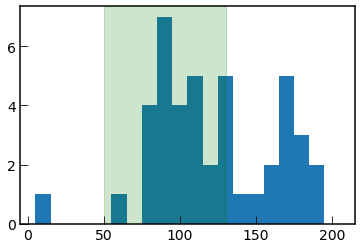

In [20]:
plt.bar(recordingTime,spikesPerBin,width=10) 
plt.axvspan(50,130,color='green',alpha=0.2) # note that the visualization of the stimulus period was not requested in the exercise
plt.show()


The `bar` function : 
1. input argument gives x values
2. input argument provides y values which are displayed as bars. The y values are the sum across each column which are the total number of spikes in each time bin across the ten recordings. 
3. input argument provided here specifies that each bar should be of width `10`. 

3. Replot the PSTH where each bar height depicts the *mean number of spikes* in each time bin. This depiction shows the average number of spikes emitted over time.

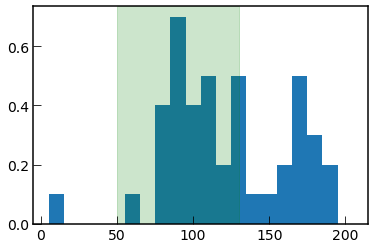

In [31]:
nTrials = np.shape(tenSpikeTrains)[0]
spikesPerBin = np.asarray(spikesPerBin)
plt.bar(recordingTime,spikesPerBin/nTrials,width=10) 
plt.axvspan(50,130,color='green',alpha=0.2) # note that the visualization of the stimulus period was not requested in the exercise
plt.show()

To get the average number of spikes, one simply divides the total number of spikes per time bin by the number of trials which is `10` in our case. 

4. What is the average firing rate during the entire recording period? Note that average refers her to the average across trials. 

In [37]:
totalNumberOfSpikes = np.sum(tenSpikeTrains)
averageNumberOfSpikesPerTrial = totalNumberOfSpikes/nTrials
totalDuration = recordingTime[-1]
print('The average firing rate is during the recording is ', averageNumberOfSpikesPerTrial*1000/totalDuration, 'spk/s' )

The average firing rate is during the recording is  21.5 spk/s


To calculate the firing rate, one counts the number of spikes across a specific interval and divides that number by the duration of the period of interest. Here, the period of interest is the duration of the recording, 200 ms. The average number of spikes during the recording is the sum of all spikes divided by the number of trials/repetitions. 